In [3]:
pwd

'/rds/general/user/dsy24/home/actress_tests/actress_luke2/actress/actress'

In [ ]:
import actress.contrasts as contrst
#from contrasts import contrast


fac_file = './df_combined_300_for_actress_spaces.txt'
phot_file = './df_combined_ssd_for_actress_spaces.txt'


#Jean's line
contrst.contrast(fac_file, wav_lower=4.3759e-7, wav_higher=4.3761e-7, N=20, ld_law='custom', save='test_fac.txt', graphs=False)
contrst.contrast(phot_file, wav_lower=4.3759e-7, wav_higher=4.3761e-7, N=20, ld_law='custom', save='test_phot.txt', graphs=False)


4.3758982e-07 4.3758982e-07
4.3759070000000004e-07 4.3759070000000004e-07
4.3759157e-07 4.3759157e-07
4.3759245000000004e-07 4.3759245000000004e-07
4.3759332e-07 4.3759332e-07
4.3759420000000003e-07 4.3759420000000003e-07
4.3759507000000006e-07 4.3759507000000006e-07
4.3759595000000003e-07 4.3759595000000003e-07
4.3759682e-07 4.3759682e-07
4.375977e-07 4.375977e-07
4.3759857e-07 4.3759857e-07
4.3759945e-07 4.3759945e-07
4.3760032000000005e-07 4.3760032000000005e-07
4.376012e-07 4.376012e-07
4.3760207000000005e-07 4.3760207000000005e-07
4.3760295000000006e-07 4.3760295000000006e-07
4.3760382e-07 4.3760382e-07
4.376047e-07 4.376047e-07
4.3760557000000004e-07 4.3760557000000004e-07
4.3760645e-07 4.3760645e-07
4.3760732000000003e-07 4.3760732000000003e-07


/rds/general/user/dsy24/home/miniforge3/envs/actress1/lib/python3.9/site-packages/actress-1.0-py3.9.egg/actress/simulator.py:622: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax1, ax2 = plt.figure(figsize=(10, 5)), plt.subplot(gs[0]), plt.subplot(gs[1])


4.3760820000000005e-07 4.3760820000000005e-07
4.3760907000000003e-07 4.3760907000000003e-07
4.3760995000000004e-07 4.3760995000000004e-07


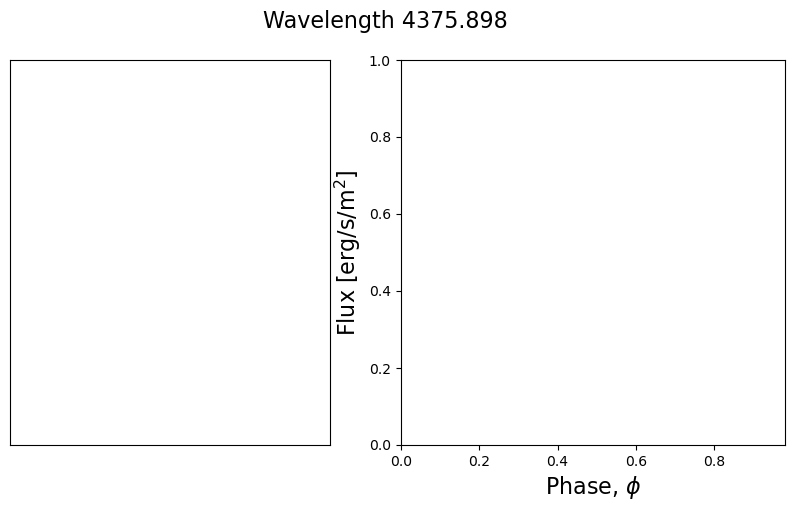

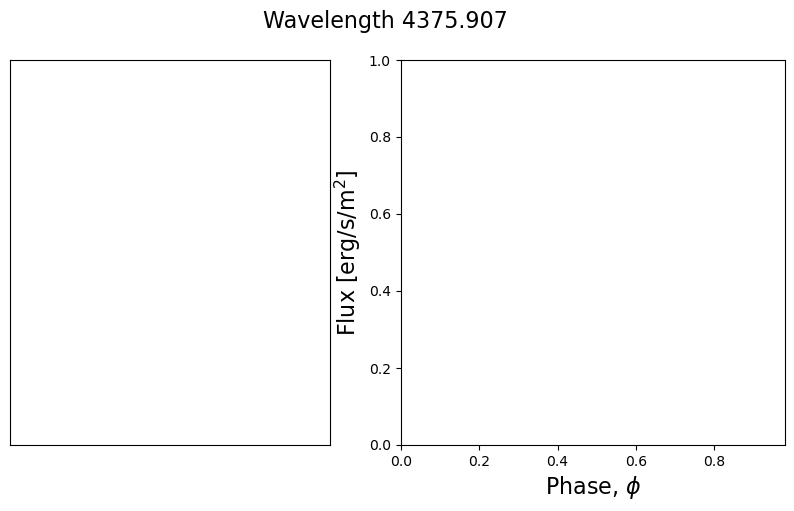

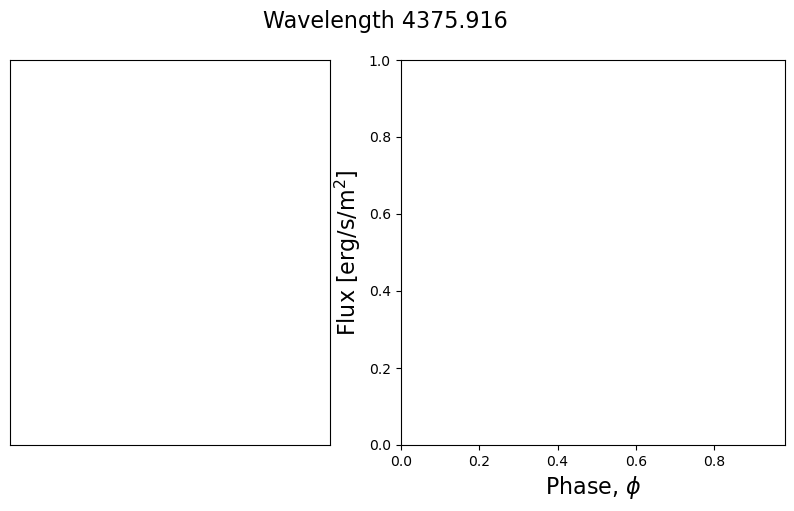

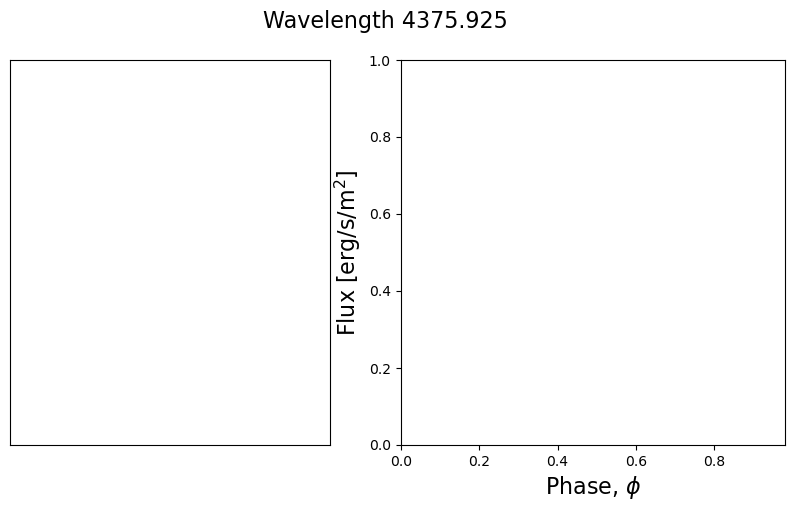

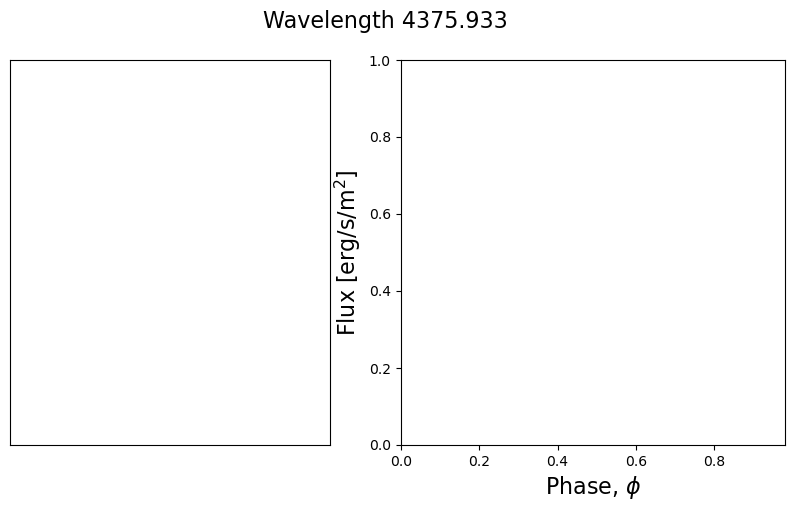

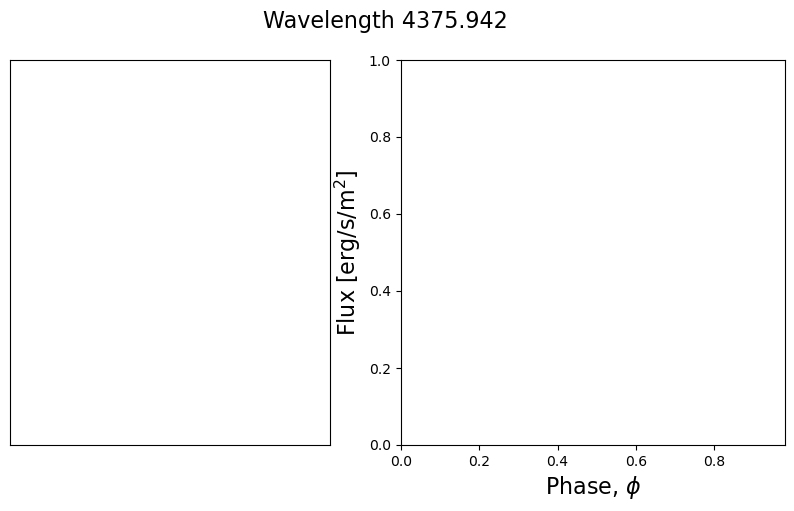

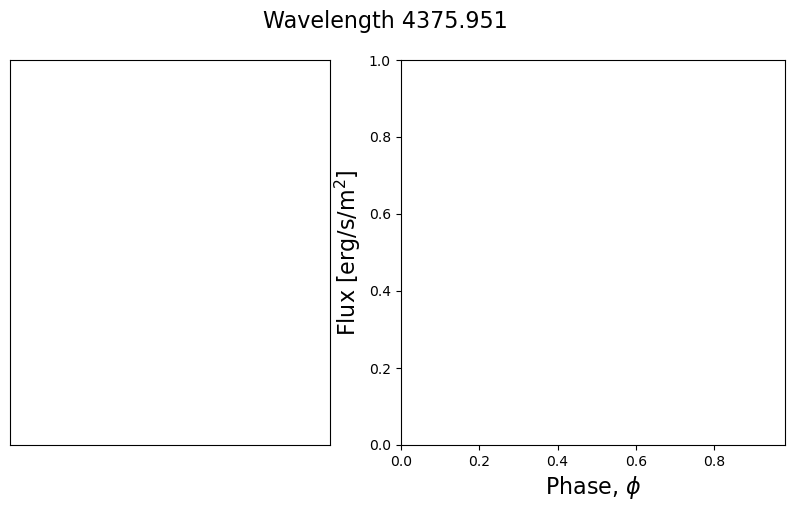

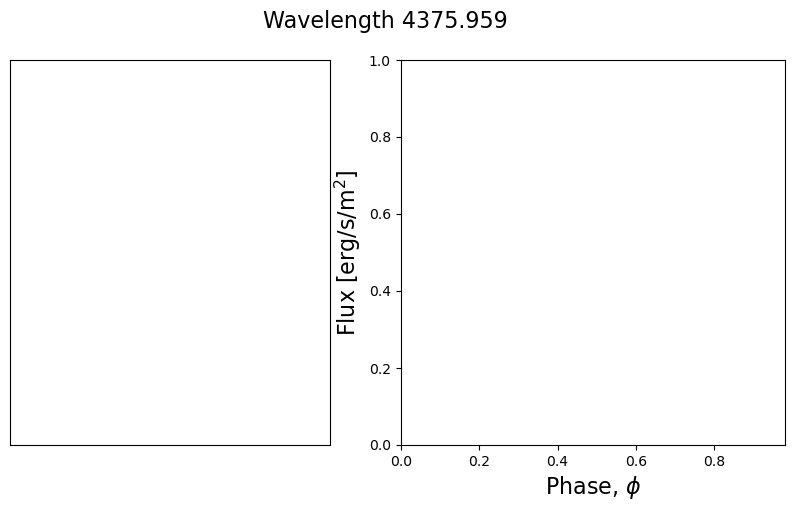

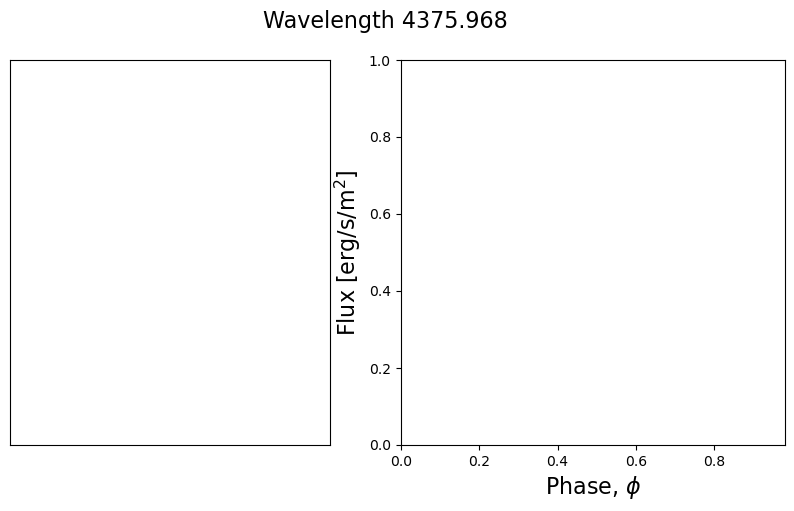

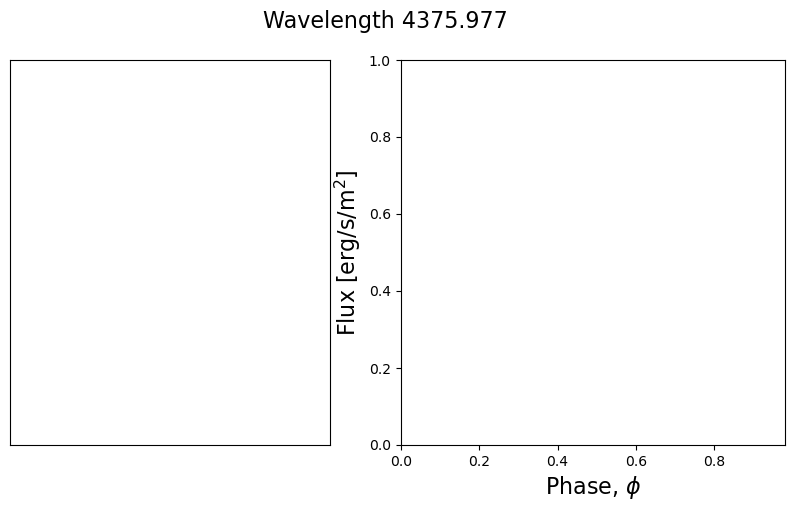

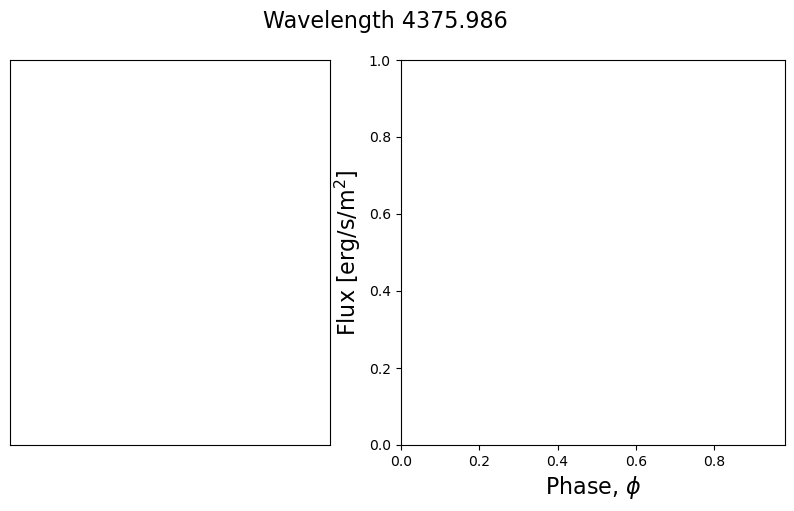

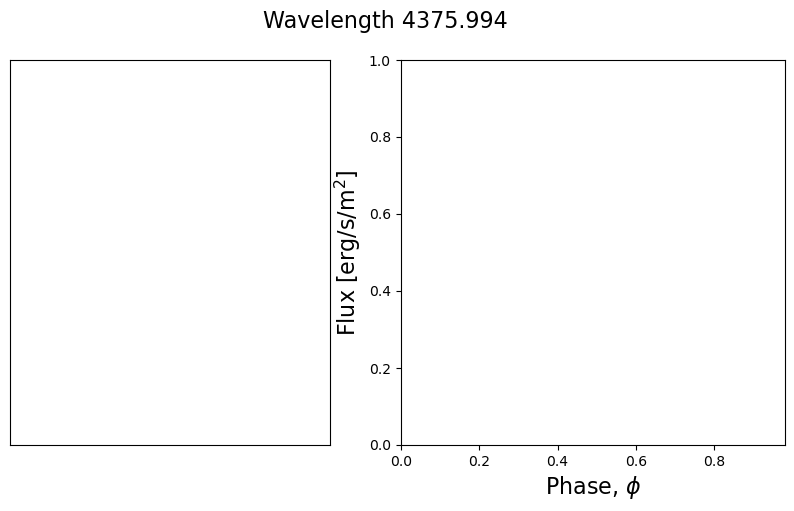

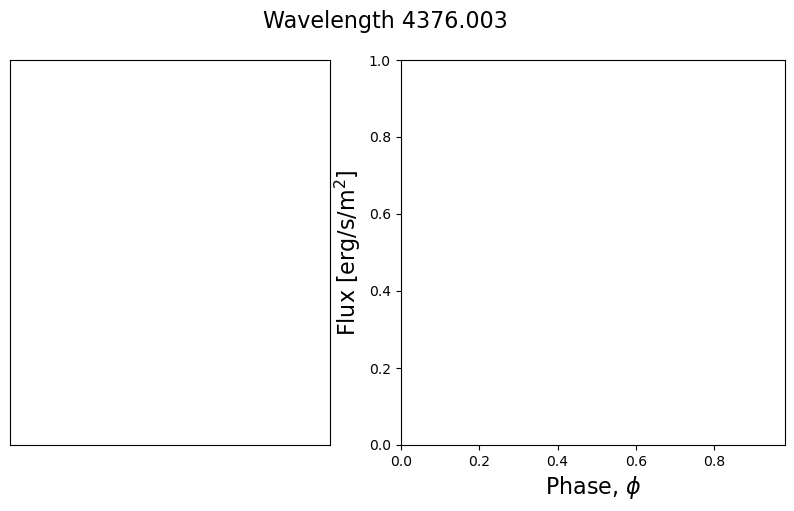

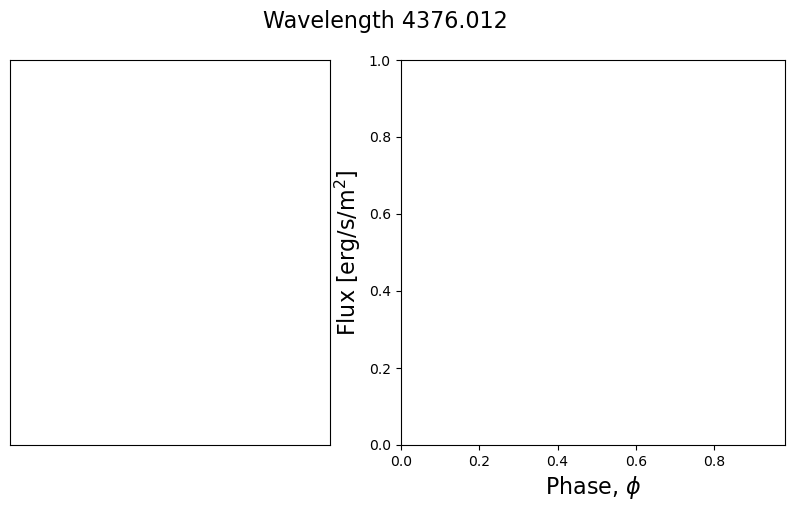

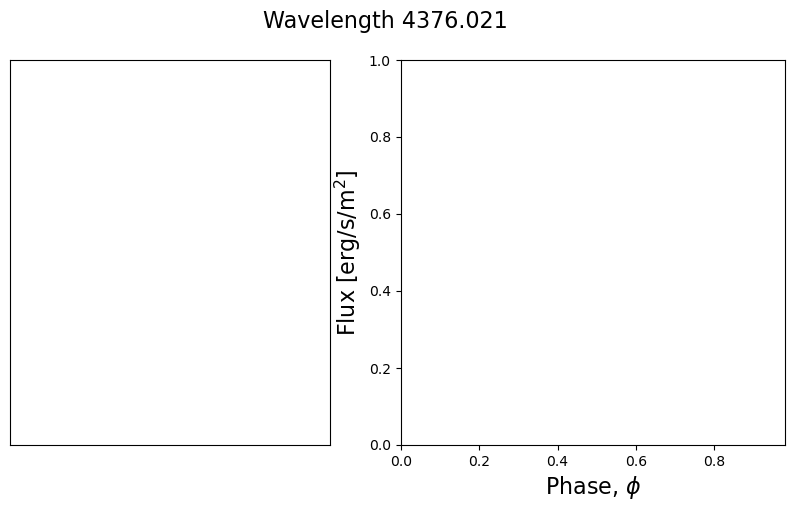

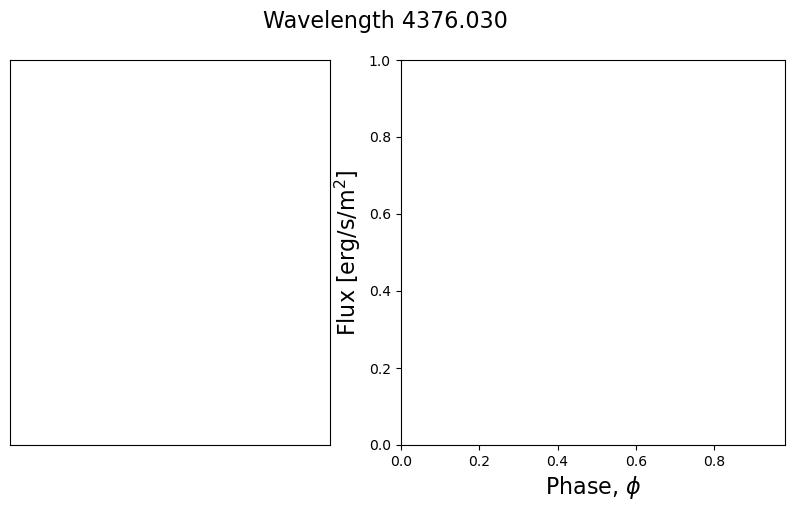

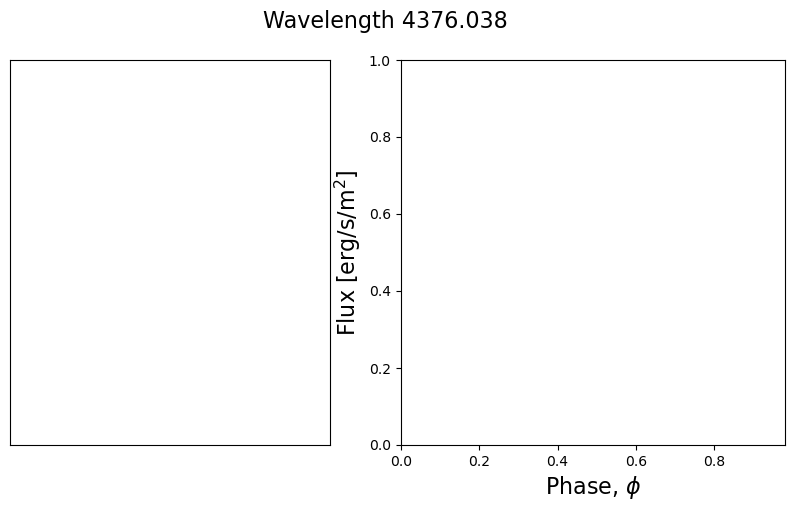

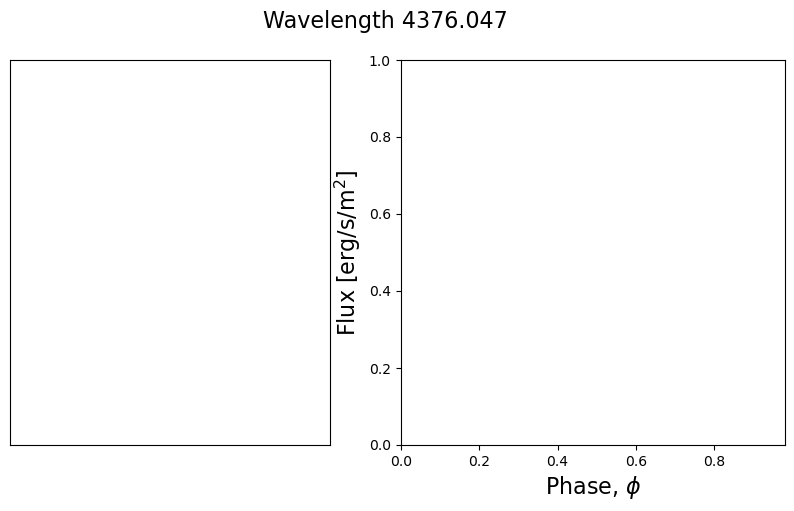

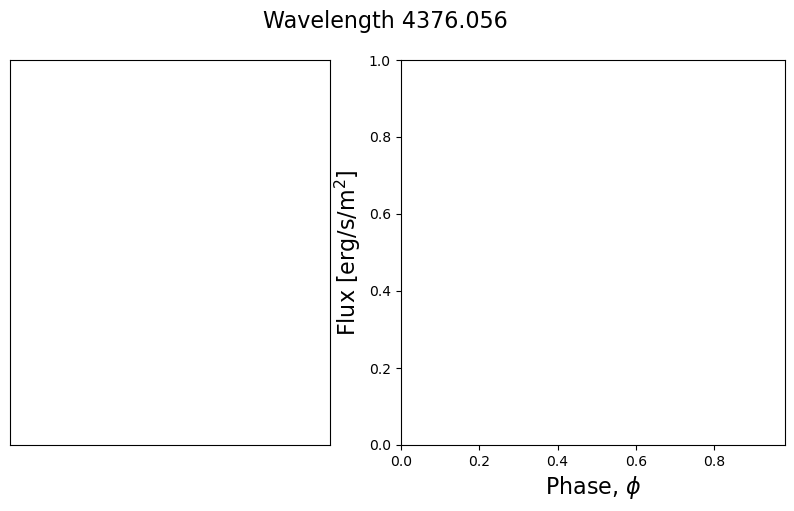

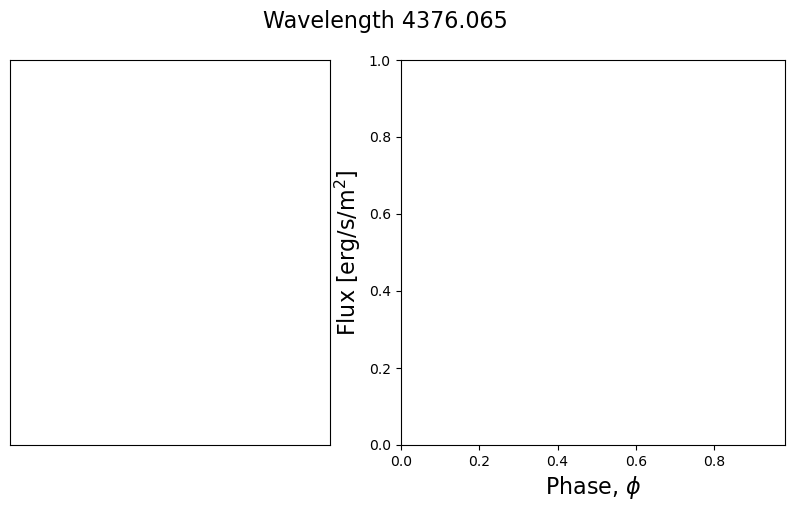

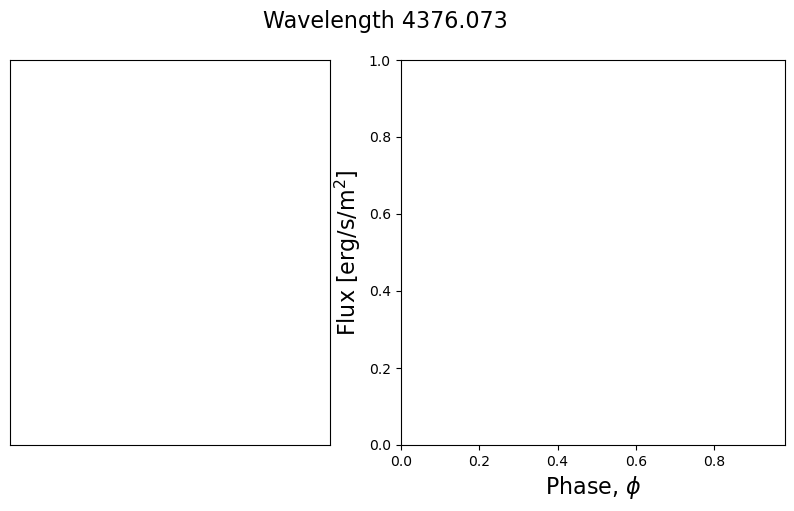

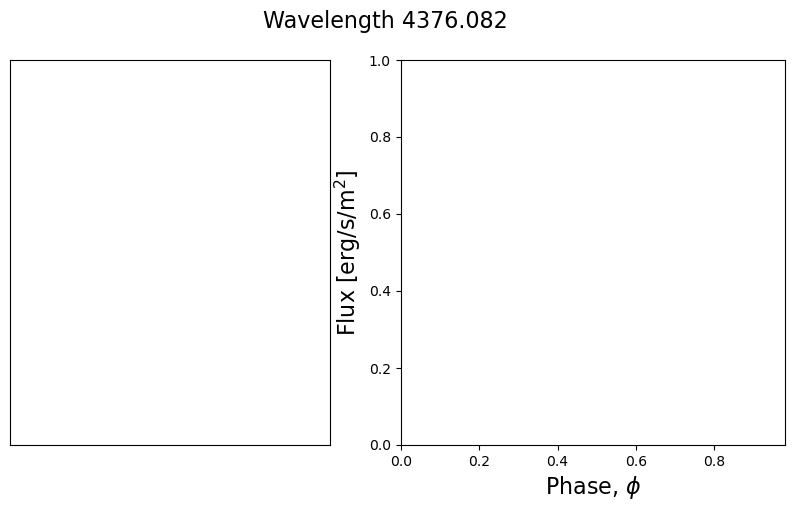

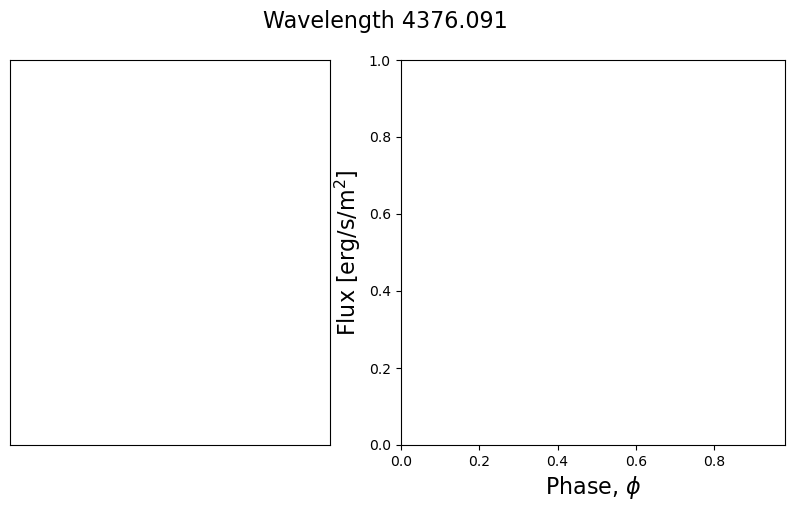

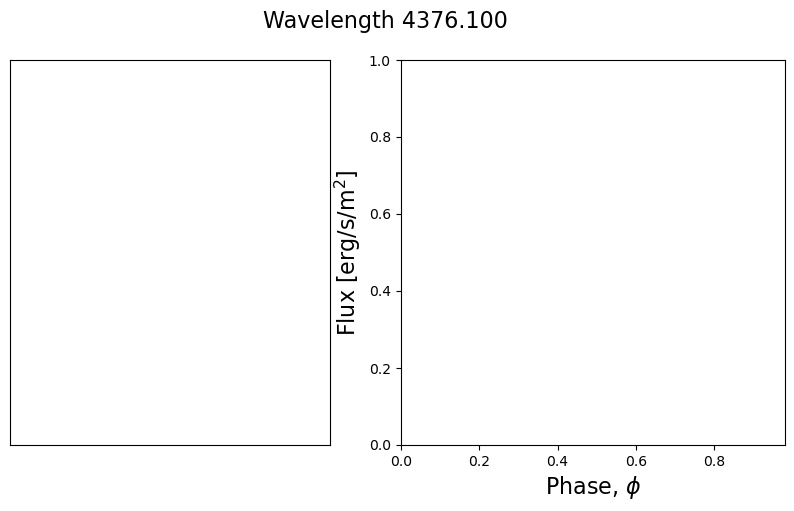

In [2]:
import actress #REFRESH BEFORE USE!
import numpy as np
import actress.run_actress_notebook as actr

hd_ld_file = 'test_phot.txt'  #Input Quiet star limb darkening file
fac_ld_file = 'test_fac.txt'  #Input Facular limb darkening file
#fac_ld_file = 'itert3126g4826_ld.txt'

params = actr.Transitparams()

# number of faculae
N = 30
# facula sizes (log-normal, clipped between 5–15)
rs = np.random.lognormal(mean=2.0, sigma=0.25, size=N)      
# For longitudes: can range from 0 to 2π (0 to 360 degrees)
longs = np.random.normal(180, 45, N)                         # Gaussian longitudes (mean=180, std=45)
# Wrap longitudes to [0, 360] range
longs = longs % 360
lats_raw = np.random.normal(0, 22.5, N) 
lats = np.clip(lats_raw, -90, 90)      


params.res = 1000          #Resolution of the simulation box #vs inside simulator.py resolution of healpix map -- explain difference, def takes longer with more resolution but can't tell from gifs??
params.rp = 0.1808            # Rp/R* 
params.b = -0.04               # Transit impact parameter
params.N = 100             # Number of data points # right now doesn't translate to rotat_anim
params.mode = 'faconly'      # 'quiet' or 'faconly'
params.fac_r    = [0]#rs#[15]
params.fac_long = [0]#longs#[45]
params.fac_lat  = [0]#lats#[45]
params.fac_band = True      # Add facular bands (True/False)
params.fac_band_low = [90]   # Lower latitude of band
params.fac_band_high = [80]  # Upper latitude of band
params.a = 25.01              # a/R* ?maybe is in actual units?
params.T = 4.544               # Orbital period 
params.phi = .03          # Phase coverage
params.ld = 'quadratic'       # Limb darkening ('power2' or 'quadratic' or 'claret')



actr.Transitsim(params).sim_spectrum(hd_ld_file=hd_ld_file, fac_ld_file=fac_ld_file, save='test_b0p5_quiet.npy')
#actr.Transitsim(params).sim_phot(hd_ld_file=hd_ld_file, fac_ld_file=fac_ld_file, save='transit_res3000_300Gfac-lat0r20_b0_claretfit_350.txt')



Selected files:


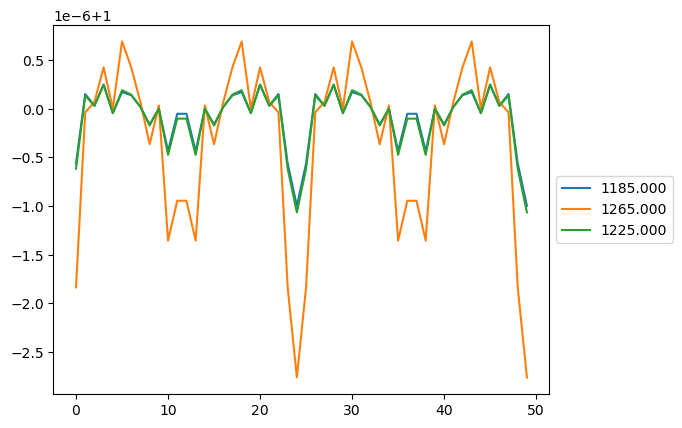

In [9]:
### FOR ROTATION LIGHTCURVES ###
import glob
import csv
import matplotlib.pyplot as plt
import numpy as np

folder_path = "./rot_lightcurve_csvs"  

# Find all CSV files matching pattern
files = glob.glob(f"{folder_path}/lightcurve_*.csv")


#patterns = ["4.344869","4.3449046", "4.3449481"]
#colors = ['blue','red' ,'purple' ]


# Select files that contain any of the patterns
#elected_files = [f for f in files if any(pat in f for pat in patterns)]
selected_files=files
print("Selected files:")

for i, file in enumerate(selected_files):
    fluxes = []
    with open(file, newline='') as f:
        reader = csv.reader(f)
        headers = next(reader)  # skip header if present
        for row in reader:
            fluxes.append(float(row[0]))
    fluxes = np.array(fluxes) / np.median(fluxes)
    times = list(range(len(fluxes)))  # use index as time
    
    plt.plot(times, fluxes, linestyle='-', label=file[33:-4])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.show()

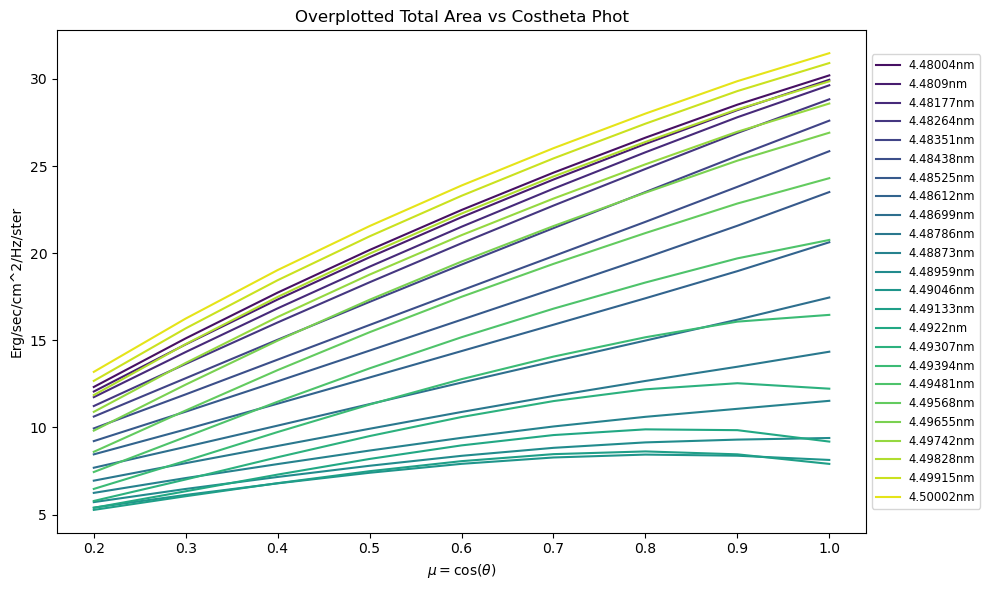

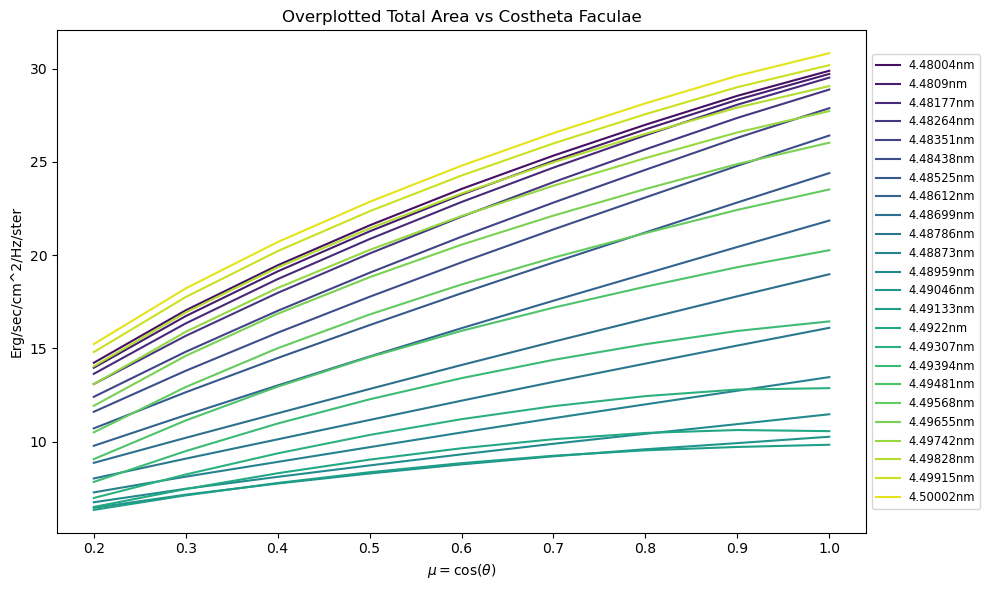

In [8]:
import glob
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import re

def extract_nm(filename):
    # Extract wavelength as float from filename, e.g., "434.48768nm"
    match = re.search(r'(\d+\.\d+)nm', filename)
    return float(match.group(1)) if match else None

phot_folder = "limb_darkening_laws_phot"
fac_folder = "limb_darkening_laws_fac"

phot_files = glob.glob(f"{phot_folder}/custom_profiletest*.csv")
fac_files = glob.glob(f"{fac_folder}/custom_profiletest*.csv")

phot_files = sorted(phot_files, key=extract_nm)
fac_files = sorted(fac_files, key=extract_nm)

plt.figure(figsize=(10,6))
phot_colors = sns.color_palette("viridis", len(phot_files))

for i, file in enumerate(phot_files):
    costheta = []
    area = []
    with open(file, newline='') as f:
        reader = csv.reader(f)
        next(reader)  # skip header
        for row in reader:
            if row:
                costheta.append(float(row[0]))
                area.append(float(row[1]))
    label = file.split('/')[-1][20:-4]
    plt.plot(costheta, area, linestyle='-', color=phot_colors[i], label=label)
    # if costheta and area:
    #     plt.text(costheta[-1] + 0.01, area[-1], str(i+1), fontsize=9, color=phot_colors[i])

plt.xlabel(r'$\mu = \cos(\theta)$')
plt.ylabel('Erg/sec/cm^2/Hz/ster')
plt.title('Overplotted Total Area vs Costheta Phot')
plt.legend(fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
fac_colors = sns.color_palette("viridis", len(fac_files))

for i, file in enumerate(fac_files):
    costheta = []
    area = []
    with open(file, newline='') as f:
        reader = csv.reader(f)
        next(reader)  # skip header
        for row in reader:
            if row:
                costheta.append(float(row[0]))
                area.append(float(row[1]))
    label =  file.split('/')[-1][20:-4]
    plt.plot(costheta, area, linestyle='-', color=fac_colors[i], label=label)
    # if costheta and area:
    #     plt.text(costheta[-1] + 0.01, area[-1], str(i+1), fontsize=9, color=fac_colors[i])

plt.xlabel(r'$\mu = \cos(\theta)$')
plt.ylabel('Erg/sec/cm^2/Hz/ster')
plt.title('Overplotted Total Area vs Costheta Faculae')
plt.legend(fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


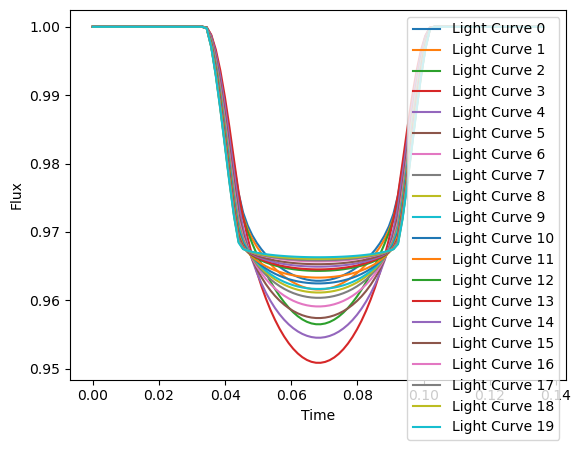

In [6]:
#### FOR TRANSIT PLOT #####

import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import pandas as pd

# Example array
file_path = 'test_b0p5_quiet.npy'

data = np.load(file_path)
print("Data shape:", data.shape)
#print(data)

#(wavelength bands, phase, give time/fluxes)
line1 = data[0, :, 0]  # First line, shape: (100,)
line2 = data[1, :, 0]  # Second line, shape: (100,)

line1 = data[:, 0]  # First line, shape: (100,)
line2 = data[1, :, 0]  # Second line, shape: (100,)

# Plot the residuals
plt.figure(figsize=(10, 6))

plt.plot(data[19,:,0], data[19,:,1], ) #should give lightcurve 
plt.plot(data[0,:,0], data[0,:,1], ) #should give lightcurve #This is in the UV and the dip is because of a faculae crossing


plt.show()

print(data[1,:,0])
print(data[2,:,1])



for i in range(20):  # Loops from 0 to 19
    #plt.figure(figsize=(8, 4))  # Create a new figure for each plot
    plt.plot(data[i, :, 0], data[i, :, 1], label=f'Light Curve {i}')
    plt.xlabel("Time")
    plt.ylabel("Flux")
    plt.legend()
    #plt.show()  # Show each plot separately

In [ ]:
#! see if i can get this to work to put spots on a star and get emission (it's disk integrated)
#! get the file from the contrasts folder shared by Yvonne
#! test if the integrated spectrum comes out the same as mine
#! add 300G splotches to ssd 
#! will have to use sage code (or something) to model rotation
#! email Jean to ask for G star spectrum , also ask him for the rotation of his star
    #! can do "dumb" gaussian convolution with rotation to see
